In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt 

**t : train data
tt : test data**

In [46]:
t = pd.read_csv("train.csv")


****keeping a unaltered copy as orignal ****

In [47]:
train_orignal=t


In [48]:
#test_orignal

***dropping all the rows containg NaN value, from train data***

In [49]:
t = t.dropna(axis=0,how='any')

# sex

In [50]:
train_orignal['sex'].value_counts()

Male      3213
Female    3125
Name: sex, dtype: int64

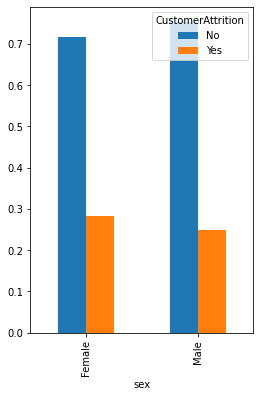

In [51]:
x=pd.crosstab(train_orignal['sex'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# Aged

In [52]:
train_orignal['Aged'].value_counts()

No     5309
Yes    1029
Name: Aged, dtype: int64

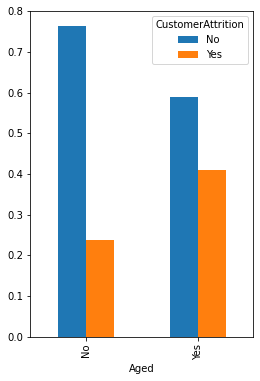

In [53]:
x=pd.crosstab(train_orignal['Aged'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# Married

In [54]:
train_orignal['Married'].value_counts()

No     3273
Yes    3065
Name: Married, dtype: int64

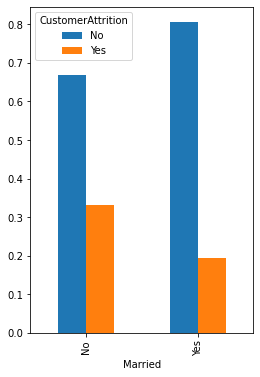

In [55]:
x=pd.crosstab(train_orignal['Married'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# Total Dependents

In [56]:
train_orignal['TotalDependents'].value_counts()

No     4432
Yes    1906
Name: TotalDependents, dtype: int64

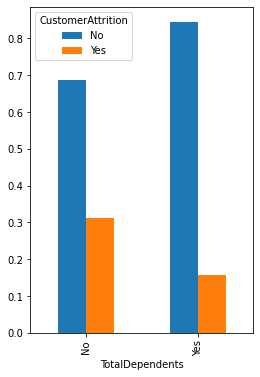

In [57]:
x=pd.crosstab(train_orignal['TotalDependents'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# Mobile Service

In [58]:
train_orignal['MobileService'].value_counts()

Yes    5772
No      566
Name: MobileService, dtype: int64

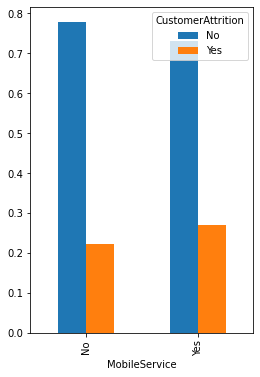

In [59]:
x=pd.crosstab(train_orignal['MobileService'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# 4G Service

In [60]:
train_orignal['4GService'].value_counts()

Wifi Broadband         2794
Satellite Broadband    2177
No                     1367
Name: 4GService, dtype: int64

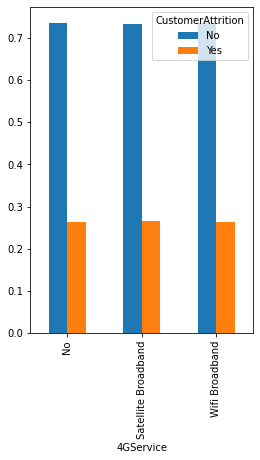

In [61]:
x=pd.crosstab(train_orignal['4GService'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

***4G Service can be removed seeing above graph***

# Cyber Protection

In [62]:
train_orignal['CyberProtection'].value_counts()

No     4508
Yes    1830
Name: CyberProtection, dtype: int64

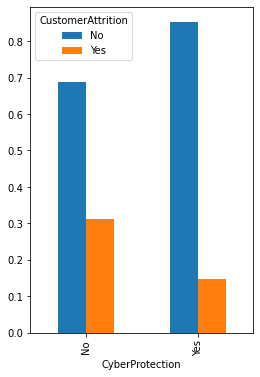

In [63]:
x=pd.crosstab(train_orignal['CyberProtection'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# Hardware Support

In [64]:
train_orignal['HardwareSupport'].value_counts()

No     4185
Yes    2153
Name: HardwareSupport, dtype: int64

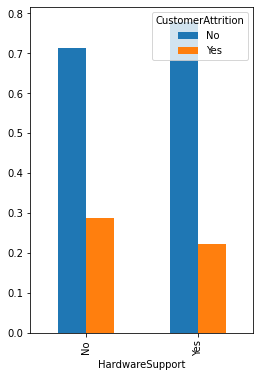

In [65]:
x=pd.crosstab(train_orignal['HardwareSupport'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# Technical Assistance

In [66]:
train_orignal['TechnicalAssistance'].value_counts()

No     4508
Yes    1830
Name: TechnicalAssistance, dtype: int64

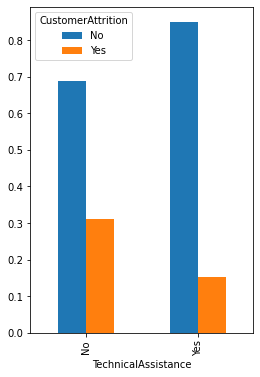

In [67]:
x=pd.crosstab(train_orignal['TechnicalAssistance'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# Film Subscription

In [68]:
train_orignal['FilmSubscription'].value_counts()

No     3908
Yes    2430
Name: FilmSubscription, dtype: int64

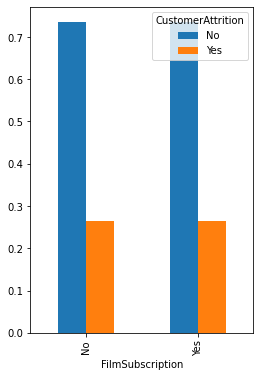

In [69]:
x=pd.crosstab(train_orignal['FilmSubscription'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

# Settlement Process

In [70]:
train_orignal['SettlementProcess'].value_counts()

Electronic    2134
Check         1453
Bank          1390
Card          1361
Name: SettlementProcess, dtype: int64

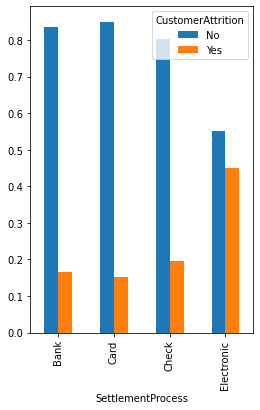

In [71]:
x=pd.crosstab(train_orignal['SettlementProcess'],train_orignal['CustomerAttrition']) 

x.div(x.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,6)) 
plt.show() 

**Here we can see that Bank, Card are  apprioximately same in quantity and nearly same numbers of YES and NO. So after seeing corelation with target we will decide of combining two or more features.**

**combining Bank to Card**

In [72]:
#t['SettlementProcess'].replace('Check', 'Card',inplace=True) 
t['SettlementProcess'].replace('Bank', 'Card',inplace=True) 


C:\Users\PRABHA\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


# making dummies for Settelement Process

In [73]:
t=pd.get_dummies(t,columns=[ 'SettlementProcess'])


# encoding YES and NO 

In [74]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Male','Female']])
t.sex = encoder.fit_transform(t.sex.values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['No','Yes']])
t.Aged = encoder.fit_transform(t.Aged.values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['Yes','No']])
t.Married = encoder.fit_transform(t.Married.values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['Yes','No']])
t.TotalDependents = encoder.fit_transform(t.TotalDependents.values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['Yes','No']])
t.MobileService = encoder.fit_transform(t.MobileService.values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['Yes','No']])
t.CyberProtection = encoder.fit_transform(t.CyberProtection.values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['No','Yes']])
t.HardwareSupport = encoder.fit_transform(t.HardwareSupport.values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['Yes','No']])
t.TechnicalAssistance = encoder.fit_transform(t.TechnicalAssistance.values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['No','Yes']])
t.FilmSubscription = encoder.fit_transform(t.FilmSubscription.values.reshape(-1,1))

In [75]:
encoder = OrdinalEncoder(categories=[['No','Yes']])
t.CustomerAttrition = encoder.fit_transform(t.CustomerAttrition.values.reshape(-1,1))

# Fnding out corelation of features with Customer Attrition

In [76]:
abs(t.corr()['CustomerAttrition'])

sex                             0.039666
Aged                            0.144317
Married                         0.154204
TotalDependents                 0.161210
ServiceSpan                     0.350081
MobileService                   0.030428
CyberProtection                 0.169028
HardwareSupport                 0.068410
TechnicalAssistance             0.164290
FilmSubscription                0.000143
QuarterlyPayment                0.188959
GrandPayment                    0.196938
CustomerAttrition               1.000000
SettlementProcess_Card          0.213571
SettlementProcess_Check         0.083230
SettlementProcess_Electronic    0.297823
Name: CustomerAttrition, dtype: float64

***we can see that Film Subscription and Mobile service are irrelavent, while SettlementProcess_Bank and SettlementProcess_Card can be combined as one single feature***

> As we see that Service span is highly corelated with target, so its square can be considered.Not always a good idea.

In [77]:
# v1 = t.ServiceSpan * t.ServiceSpan
# t1 = tt.ServiceSpan * tt.ServiceSpan

In [78]:
# t['v1']=v1
# tt['t1']=t1

# Setting Customer Attrition column as target and rest as input features

In [79]:
y = t['CustomerAttrition']
X = t.drop('CustomerAttrition', axis=1)

# Dropping irrelavent features

In [80]:
X = X.drop(['MobileService','4GService','FilmSubscription'], axis=1)

# Visualizing relation using heatmap

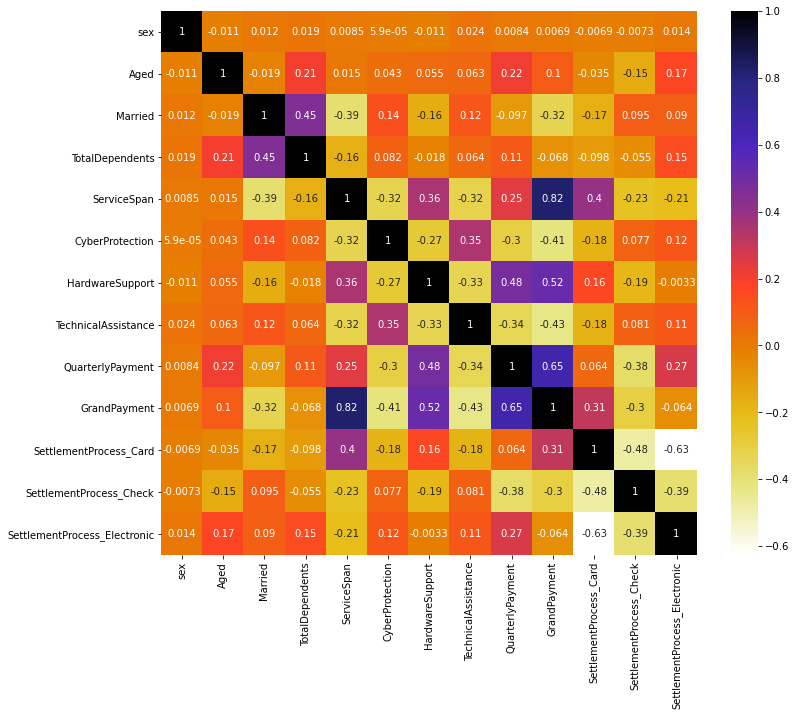

In [81]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor,annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

## seeing above corelatin matrix we can even remove GrandPayment column or keep GrandPayment and remove REST of the columns which relates >0.6 with GrandPayment

## in this not removed

# checking variance of input features

In [82]:
X.var()

sex                             2.499933e-01
Aged                            1.361899e-01
Married                         2.497482e-01
TotalDependents                 2.098813e-01
ServiceSpan                     6.025230e+02
CyberProtection                 2.053919e-01
HardwareSupport                 2.243079e-01
TechnicalAssistance             2.053919e-01
QuarterlyPayment                9.111039e+02
GrandPayment                    5.131045e+06
SettlementProcess_Card          2.457379e-01
SettlementProcess_Check         1.762342e-01
SettlementProcess_Electronic    2.235417e-01
dtype: float64

In [83]:
X.set_index('ID',inplace=True)

# making model

In [84]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from imblearn.over_sampling import *
from imblearn.under_sampling import *

# run train_test_split, if you are validating using train set

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# checking dataset is Balanced or Imbalanced

In [86]:
train_orignal['CustomerAttrition'].value_counts()

No     4658
Yes    1680
Name: CustomerAttrition, dtype: int64

> **we can see that dataset is highly imbalanced****

# Oversampling Data as not evenly distributed

## if we want to validate our model using 30% of train data, then we need to oversample only train data i.e. after splitting we get X_train and y_train, we will oversample this and test or validate on rest 30% i.e. X_test and y_test

In [87]:
sm = RandomOverSampler(random_state=200)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [88]:
model = RandomForestClassifier(criterion='entropy').fit(X_res, y_res)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("F1", f1_score(y_test, y_pred))
print("ConfusionMATRIX",confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1411
         1.0       0.57      0.57      0.57       488

    accuracy                           0.78      1899
   macro avg       0.71      0.71      0.71      1899
weighted avg       0.78      0.78      0.78      1899

Precision 0.5728952772073922
Recall 0.5717213114754098
F1 0.5723076923076923
ConfusionMATRIX [[1203  208]
 [ 209  279]]


# Using Random Serch CV and Grid Serch CV for hyperparameter optimization in RandomForestClassifier

## please uncomment for running, i have commented as it takes time to run all

In [89]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [90]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_res,y_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   random_state=100, verbose=2)

In [91]:
rf_randomcv.best_params_

{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 157,
 'criterion': 'gini'}

In [92]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   random_state=100, verbose=2)

In [93]:
best_random_grid=rf_randomcv.best_estimator_

## run below cell only if splitted train set for validating

## below cell will give result with RandomSearch

In [94]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1193  218]
 [ 200  288]]
Accuracy Score 0.779884149552396
Classification report:               precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      1411
         1.0       0.57      0.59      0.58       488

    accuracy                           0.78      1899
   macro avg       0.71      0.72      0.72      1899
weighted avg       0.78      0.78      0.78      1899



## using Random Search parameters in Grid Search
## run this after running RandomSearch cells except just above one

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [157], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [66, 166, 266, 366, 466]}


In [96]:

#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_res,y_res)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


C:\Users\PRABHA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.90300842 0.8999201
 0.90177243 0.90208083 0.89930257 0.89899083 0.89837498 0.90161834
 0.90038354 0.89960955 0.88710096 0.89266033 0.89327762 0.89250553
 0.89219641        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.84879191
 0.84693672 0.84925535 0.84940871 0.84971903 0.84740373 0.84909912
 0.84724607 0.84940895 0.84940991 0.84910007 0.84894599 0.84987239
 0.85002815 0.84879071        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.82237654 0.82314934 0.82253015 0.82160398 0.82438295 0.81959638
 0.82392214 0.8225311  0.82422792 0.82284022 0.82283998 0.82438343
 0.82283879 0.82191191 0.82222175]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [157],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [66, 166, 266, 366, 466]},
             verbose=2)

In [97]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=157, max_features='log2', n_estimators=66)

In [99]:
best_grid=grid_search.best_estimator_

In [100]:
best_grid

RandomForestClassifier(max_depth=157, max_features='log2', n_estimators=66)

## run below cell only if splitted train set for validating

In [101]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1196  215]
 [ 212  276]]
Accuracy Score 0.775144813059505
Classification report:               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1411
         1.0       0.56      0.57      0.56       488

    accuracy                           0.78      1899
   macro avg       0.71      0.71      0.71      1899
weighted avg       0.78      0.78      0.78      1899



**We can see their is no improvement. So, grid CV can be avoided or only one CV can be performed.**